<div class="alert alert-block alert-success">
    
    
# <center> Project Phase 4 </center>


<br>
    
</div>


<div class="alert alert-info">

## <center> Requirements </center>


</div>


<div class="alert alert-warning">
1.	Create Customer-Friends-Product-Reviews graph database for OnMart

<br><br>
    
    
**Use PurchasesLog Dataset**
    
<br><br>
    

</div>

// delete existing graph

match (n) detach delete n;


// verify you have no nodes/relationships in your graph

match (n) return n;


// Create the customer nodes

LOAD CSV WITH HEADERS FROM 'file:///Sample_Orders_Log_1000_Transactions.csv' AS row
MERGE (c:Customer {customerID: row.customerID, lastName: row.lastName, firstName: row.firstName})


// UNWIND multiple values for FRIENDS of the customer
// And build FRIEND_WITH relationship

LOAD CSV WITH HEADERS FROM 'file:///Sample_Orders_Log_1000_Transactions.csv' AS row
MATCH (c:Customer {customerID: row.customerID})
WITH c, row
UNWIND split(row.friends, ';') AS friend
MATCH (f:Customer {customerID: friend})
MERGE (c)-[:FRIEND_WITH]->(f)


// Create the Review Nodes

LOAD CSV WITH HEADERS FROM 'file:///Sample_Orders_Log_1000_Transactions.csv' AS row
WITH row
WHERE NOT row.reviewID IS NULL
MERGE (r:Review {reviewID: row.reviewID, rating: row.rating})


// Create the WROTE_REVIEW relationship

LOAD CSV WITH HEADERS FROM 'file:///Sample_Orders_Log_1000_Transactions.csv' AS row
WITH row
WHERE NOT row.reviewID IS NULL
MATCH (c:Customer {customerID: row.customerID})
MATCH (r:Review {reviewID: row.reviewID})
MERGE (c)-[:WROTE_REVIEW]->(r)


// Create the Category nodes

LOAD CSV WITH HEADERS FROM 'file:///Sample_Orders_Log_1000_Transactions.csv' AS row
MERGE (cat:Category {category: row.category})


// Create the Product nodes

LOAD CSV WITH HEADERS FROM 'file:///Sample_Orders_Log_1000_Transactions.csv' AS row
MERGE (p:Product {productID: row.productID, productName: row.productName})


// Create the IN_CATEGORY relationship

LOAD CSV WITH HEADERS FROM 'file:///Sample_Orders_Log_1000_Transactions.csv' AS row
WITH row
MATCH (p:Product {productID: row.productID})
MATCH (cat:Category {category: row.category})
MERGE (p)-[:IN_CATEGORY]->(cat)


// Create the REVIEWS relationship

LOAD CSV WITH HEADERS FROM 'file:///Sample_Orders_Log_1000_Transactions.csv' AS row
WITH row
WHERE NOT row.reviewID IS NULL
MATCH (r:Review {reviewID: row.reviewID})
MATCH (p:Product {productID: row.productID})
MERGE (r)-[:REVIEWS]->(p)

// Create graph projection 
CALL gds.graph.project('OnMart_v1', ['Category', 'Customer', 'Product', 'Review'], ['REVIEWS','IN_CATEGORY','WROTE_REVIEW','FRIEND_WITH'])


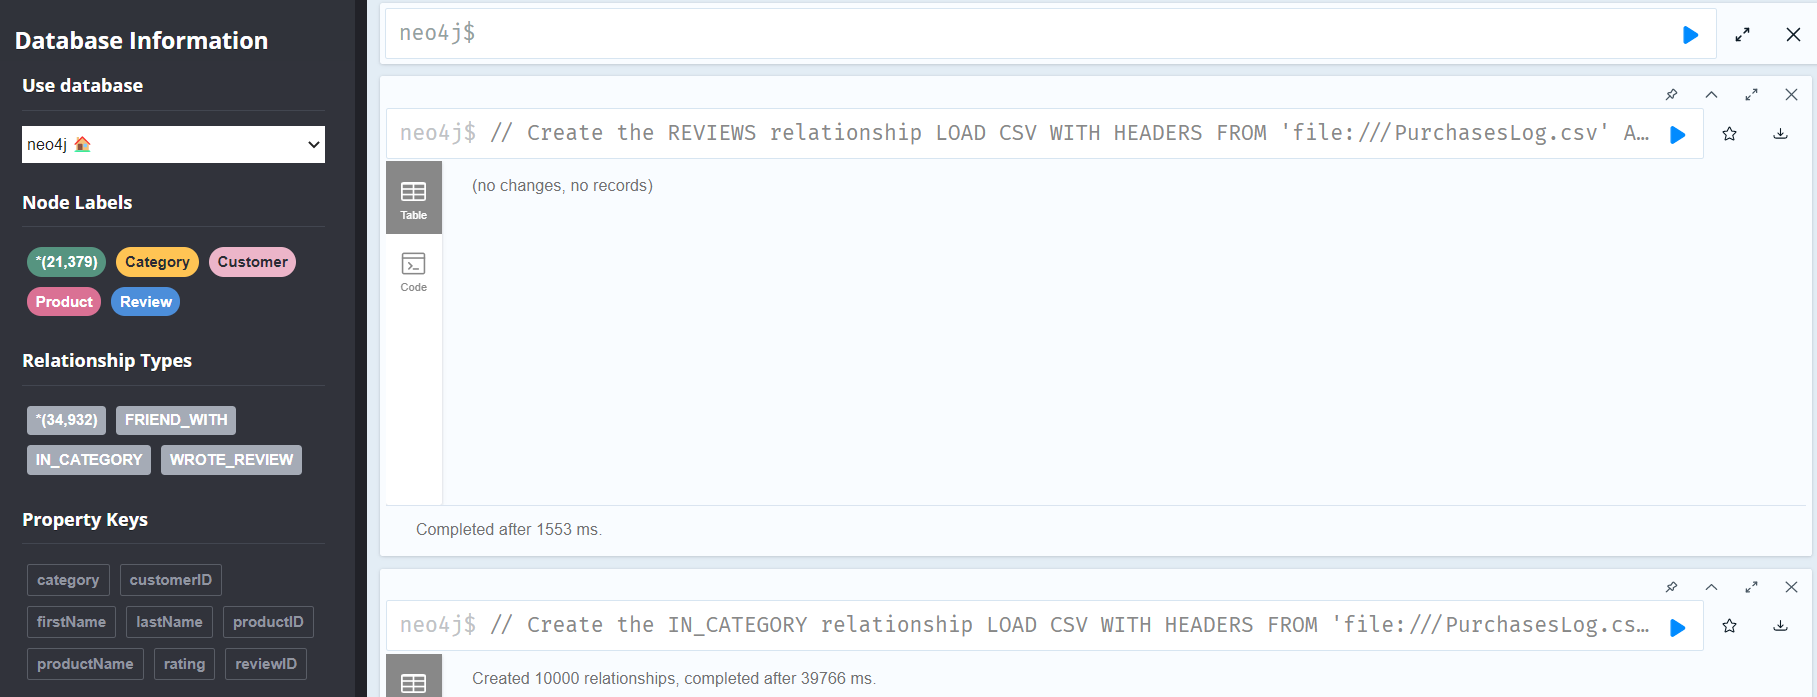

<div class="alert alert-warning">
2.	Use Google PageRank, and the graph database that you created above for customer reviews/ratings to find influential reviewers
    
<br><br>
    
    
**Use PurchasesLog Dataset**
    
<br><br>
    
    
    
</div>

<div class="alert alert-warning">
3.	Use Betweenness Centrality and PageRank algorithms to find which OnMart superstore super-connected and influential reviewers  who can be used  to identify products from the Furniture department that it could use in a cross-promotion with the newly introduced Samsung TV  in the Electronics department
    
    
<br><br>
    
    
**Use PurchasesLog Dataset**
    
<br><br>
    
    
    
</div>

<div class="alert alert-warning">
4.	The day of the week that has the maximum number of purchases made 
</div>

<div class="alert alert-warning">
5.	The month of the year that has the highest sales revenue
</div>

<div class="alert alert-warning">
6.	The weekly sales revenue forecast per zip-code
</div>

<div class="alert alert-warning">
7.	The daily number of purchases forecast per distribution center

</div>

<div class="alert alert-warning">
8.	The weekly number of product returns forecast per warehouse
    
</div>

<div class="alert alert-warning">
9.	Whether the number of delayed deliveries per zip-code positively correlated to the number of returned purchases/products.    
</div>

<div class="alert alert-warning">
10.	The busiest zip code (counting both deliveries and purchase returns)
</div>

<div class="alert alert-warning">
11.	The most selling product in every zip-code
</div>

<div class="alert alert-warning">
12.	Analyze whether the sales of the Electronics department  and  the Clothing department have similar seasonal patterns
</div>

<div class="alert alert-warning">
13.	Product purchases seasonality through the year; for example, Back-to-School, Christmas, Superbowl, Weather, etc.
</div>

<div class="alert alert-warning">
14.	Build time series analysis model for product X (specify product)  in zip-code Y (specify zip code) to forecast daily sales revenue
</div>